In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


In [3]:
train_dataset = train.flow_from_directory(r"C:\Users\shilp\OneDrive\Desktop\crop disease\dataset\train",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_dataset = test.flow_from_directory(r"C:\Users\shilp\OneDrive\Desktop\crop disease\dataset\test",
                                          target_size=(224,224),
                                          batch_size =32,
                                          class_mode = 'categorical')

Found 10100 images belonging to 33 classes.
Found 3300 images belonging to 33 classes.


In [4]:
test_dataset.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry_(including_sour)___Powdery_mildew': 4,
 'Cherry_(including_sour)___healthy': 5,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn_(maize)___Common_rust_': 7,
 'Corn_(maize)___Northern_Leaf_Blight': 8,
 'Corn_(maize)___healthy': 9,
 'Grape___Black_rot': 10,
 'Grape___Esca_(Black_Measles)': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Peach___Bacterial_spot': 14,
 'Peach___healthy': 15,
 'Pepper,_bell___Bacterial_spot': 16,
 'Pepper,_bell___healthy': 17,
 'Potato___Early_blight': 18,
 'Potato___Late_blight': 19,
 'Potato___healthy': 20,
 'Strawberry___Leaf_scorch': 21,
 'Strawberry___healthy': 22,
 'Tomato___Bacterial_spot': 23,
 'Tomato___Early_blight': 24,
 'Tomato___Late_blight': 25,
 'Tomato___Leaf_Mold': 26,
 'Tomato___Septoria_leaf_spot': 27,
 'Tomato___Spider_mites Two-spotted_spider_mite': 28,
 'Tomato___Target_Spot'

In [5]:
#model building
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(33,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
r = model.fit(train_dataset,epochs =10,validation_data = test_dataset)

Epoch 1/10
316/316 [==============================] - 866s 3s/step - loss: 2.1813 - accuracy: 0.3655 - val_loss: 1.0743 - val_accuracy: 0.6724
Epoch 2/10
316/316 [==============================] - 1406s 4s/step - loss: 0.9054 - accuracy: 0.7225 - val_loss: 0.4691 - val_accuracy: 0.8582
Epoch 3/10
316/316 [==============================] - 1143s 4s/step - loss: 0.4642 - accuracy: 0.8480 - val_loss: 0.2912 - val_accuracy: 0.9006
Epoch 4/10
316/316 [==============================] - 474s 2s/step - loss: 0.2229 - accuracy: 0.9283 - val_loss: 0.1031 - val_accuracy: 0.9652
Epoch 5/10
316/316 [==============================] - 661s 2s/step - loss: 0.1611 - accuracy: 0.9446 - val_loss: 0.1348 - val_accuracy: 0.9597
Epoch 6/10
316/316 [==============================] - 883s 3s/step - loss: 0.1043 - accuracy: 0.9652 - val_loss: 0.1391 - val_accuracy: 0.9552
Epoch 7/10
316/316 [==============================] - 1298s 4s/step - loss: 0.0769 - accuracy: 0.9732 - val_loss: 0.0733 - val_accuracy: 0.9

In [9]:
acc_score=model.evaluate(test_dataset)

104/104 [==============================] - 32s 310ms/step - loss: 0.0903 - accuracy: 0.9718


In [10]:
model.save('keras_model.h5')

C:\Users\shilp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


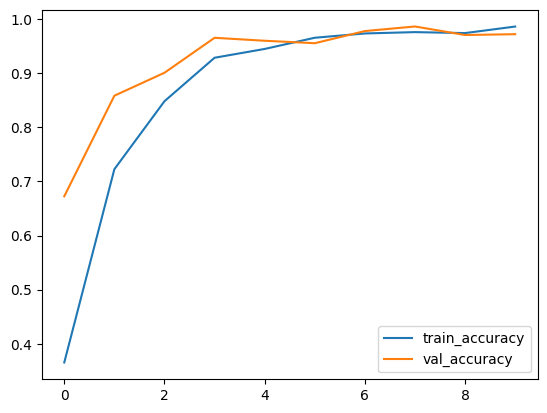

In [11]:
#Display the accuracy
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

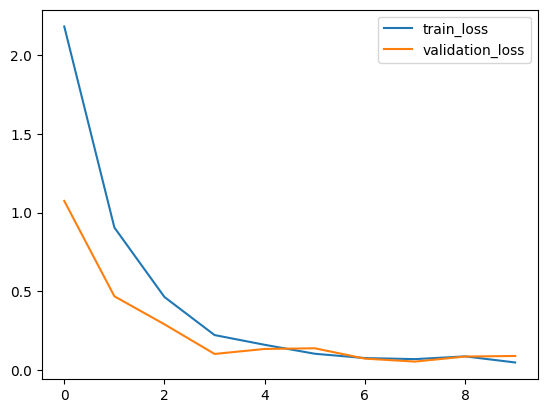

In [12]:
#Display the loss

plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()